In [1]:
import numpy as np 
import pandas as pd 

import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import re
import string
from string import digits
import re
import string
from string import digits

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

import matplotlib.pyplot as plt
import os

In [19]:
lines = pd.read_csv("Desktop\dataset\Hindi_English_Truncated_Corpus (1).csv")
lines.head()

,source,english_sentence,hindi_sentence
0,ted,I was waiting for my bag.\n,मैं अपने बैग का इंतजार कर रहा था
1,ted,"So even if it's a big video, I will clearly me...","इसलिए भले ही यह एक बिग वीडियो हो, मैं clearly..."
2,ted,Definitely share your feedback in the comment ...,अपना feedback comment सेक्शन में जरूर साझा करे�
3,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
4,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...


In [20]:
lines['source'].value_counts()

source
tides        50000
ted          39884
indic2012    37726
Name: count, dtype: int64

In [21]:
lines=lines[lines['source']=='ted']

In [22]:
lines.drop_duplicates(inplace=True)

In [23]:
lines=lines.sample(n=25000, random_state=101)
lines.shape

(25000, 3)

# Data Preprocessing

In [24]:
# Lowercase all characters
lines['english_sentence']=lines['english_sentence'].apply(lambda x: x.lower())
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: x.lower())

In [25]:
# Remove quotes
lines['english_sentence']=lines['english_sentence'].apply(lambda x: re.sub("'", '', x))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: re.sub("'", '', x))

In [26]:
exclude = set(string.punctuation) # Set of all special characters
# Remove all the special characters
lines['english_sentence']=lines['english_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [27]:
# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
lines['english_sentence']=lines['english_sentence'].apply(lambda x: x.translate(remove_digits))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: x.translate(remove_digits))
lines['hindi_sentence'] = lines['hindi_sentence'].apply(lambda x: re.sub("[२३०८१५७९४६]", "", x))

In [28]:
# Remove extra spaces
lines['english_sentence']=lines['english_sentence'].apply(lambda x: x.strip())
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: x.strip())
lines['english_sentence']=lines['english_sentence'].apply(lambda x: re.sub(" +", " ", x))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: re.sub(" +", " ", x))

In [29]:
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: re.sub("[a-zA-Z]", " ", x))

In [30]:
lines.head()

,source,english_sentence,hindi_sentence
97927,ted,so for example,तो उदाहरण के लिए
105781,ted,i got an interesting phone call once from columbo,एक बार मुझे कोलम्बो से एक दिलचस्प फोन कॉल आई
25319,ted,and a lecture wants to give you a bit of infor...,एक व्याख्यान आपको बस थोडी जानकारी देना चाहता है
95118,ted,i know i didnt and i still dont,मैं जानती हूँ कि मैं नहीं करती थी और अब भी नही...
55820,ted,that not only do the jets come from,ये फव्वारे केवल


In [32]:
stop_words = stopwords.words('english')

In [33]:
corpus = ' '
for line in lines['english_sentence']:
    corpus += ' '.join(line.split())
corpus

' so for examplei got an interesting phone call once from columboand a lecture wants to give you a bit of informationi know i didnt and i still dontthat not only do the jets come fromare all treated like thievesand because our elections had to be moved to south africaand what we found was pretty shockingof knowledge of people without attributing themwe madewith something focused on entertainmentimagine if you will a giftnot only has undertaken economic reformsparticularly to anybody whos come to oxford from abroadthey have increased the security of proprietorsa ridiculous ideait seems the perfect mediumi swearwho refused to get itonce that trust was builtthis is one of my sons rayanand whether or not the streets were done wellthis next artist is probably the alpha malean embassy of peoplebecause in that moment theres no mark by tonys nameand the computer can do two thingsexactly how much wind potential there isand if you remember one thing from what i want to talk about todayis that th

In [34]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


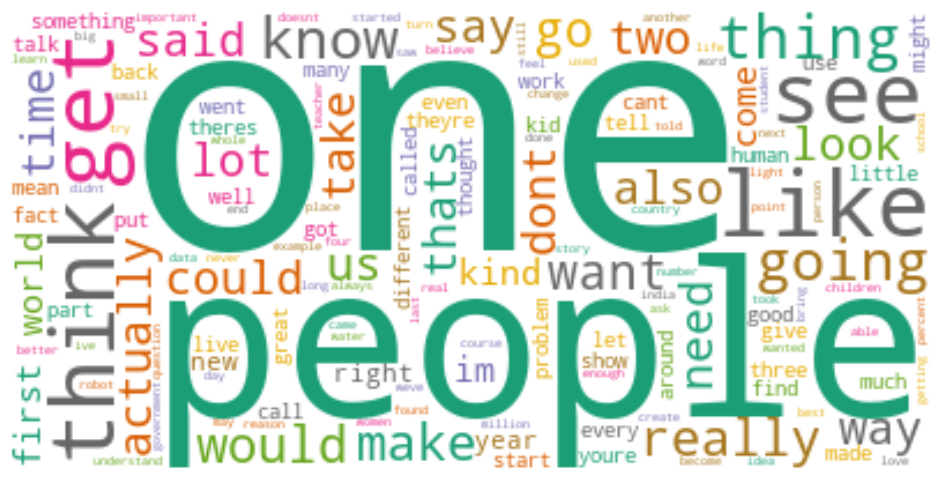

In [35]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150 )

wc.generate(corpus)

plt.rcParams["figure.figsize"] = (16,6)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
    
plt.show()

In [36]:
# Vectorize the data

input_texts = []
target_texts = []

input_characters = set()
target_characters = set()

In [37]:
for line in lines['english_sentence']:
    input_texts.append(line)
    for char in line:
        if re.findall("[a-zA-Z]", char) or char == ' ':
            if char not in input_characters:
                input_characters.add(char)
            
for line in lines['hindi_sentence']:
    
    target_text = '%' + line + '$'
    
    target_texts.append(line)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

In [38]:
target_characters

{' ',
 '$',
 '%',
 '¥',
 '½',
 'ँ',
 'ं',
 'ः',
 'अ',
 'आ',
 'इ',
 'ई',
 'उ',
 'ऊ',
 'ऋ',
 'ऍ',
 'ऎ',
 'ए',
 'ऐ',
 'ऑ',
 'ऒ',
 'ओ',
 'औ',
 'क',
 'ख',
 'ग',
 'घ',
 'ङ',
 'च',
 'छ',
 'ज',
 'झ',
 'ञ',
 'ट',
 'ठ',
 'ड',
 'ढ',
 'ण',
 'त',
 'थ',
 'द',
 'ध',
 'न',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ल',
 'व',
 'श',
 'ष',
 'स',
 'ह',
 '़',
 'ा',
 'ि',
 'ी',
 'ु',
 'ू',
 'ृ',
 'ॄ',
 'ॅ',
 'ॆ',
 'े',
 'ै',
 'ॉ',
 'ॊ',
 'ो',
 'ौ',
 '्',
 '।',
 '॰',
 '\u200b',
 '\u200c',
 '‘',
 '“',
 '”',
 '…',
 '™',
 '♫',
 '�'}

In [ ]:
# for line in lines['english_sentence']:
#     for word in line.split():
#         if word not in input_characters:
#             input_characters.add(word)
        
# for line in lines['hindi_sentence']:
#     for word in line.split():
#         if word not in target_characters:
#             target_characters.add(word)

In [ ]:
# from nltk import ngrams 
# list(ngrams(words,2))

In [39]:
#input_characters
input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))

num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)

max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

In [40]:
print("Number of samples : ", len(input_texts))
print("Number of unique input tokens : ", num_encoder_tokens)
print("Number of unique output tokens : ", num_decoder_tokens)
print("Max sequence length for inputs : ", max_encoder_seq_length)
print("Max sequence length for outputs : ", max_decoder_seq_length)

Number of samples :  25000
Number of unique input tokens :  27
Number of unique output tokens :  84
Max sequence length for inputs :  113
Max sequence length for outputs :  132


In [41]:
input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])

# Encoder and Decoder Architecture

In [42]:
encoder_input_data = np.zeros((len(input_texts), max_encoder_seq_length, num_encoder_tokens), dtype='float32')
decoder_input_data = np.zeros((len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype='float32')
decoder_target_data = np.zeros((len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype='float32')

In [43]:
print("Encoder input data : ", encoder_input_data.shape)
print("Decoder input data : ", decoder_input_data.shape)
print("Decoder target data : ", decoder_target_data.shape)

Encoder input data :  (25000, 113, 27)
Decoder input data :  (25000, 132, 84)
Decoder target data :  (25000, 132, 84)


# Coverting text into one hot encoding

In [44]:
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        if re.findall("[a-zA-Z]", char) or char == ' ': 
            encoder_input_data[i,t, input_token_index[char]] = 1
    encoder_input_data[i,t+1:, input_token_index[' ']] = 1
    
    for t, char in enumerate(target_text):
        decoder_input_data[i, t, target_token_index[char]] = 1
        
        if t > 0:
            decoder_target_data[i, t-1, target_token_index[char]] = 1
            
    decoder_input_data[i,t+1:, target_token_index[' ']] = 1
    decoder_target_data[i, t:, target_token_index[' ']] = 1

In [45]:
encoder_input_data[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
batch_size = 128 # Batch size for training
epochs = 5 # Number of epochs to train for
latent_dim = 256

# Encoder LSTM model

In [48]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Decoder LSTM Model

In [49]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the 
# return states in the training model, but we will use them in inference.

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [50]:
# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, 27)]           0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, None, 84)]           0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 256),                290816    ['input_2[0][0]']             
                              (None, 256),                                                        
                              (None, 256)]                                                        
                                                                                              

In [52]:
checkpoint_path = "/kaggle/working/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [53]:
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
         callbacks=[cp_callback]);

Epoch 1/50
157/157 [==============================] - ETA: 0s - loss: 1.1975 - accuracy: 0.7669
Epoch 1: saving model to /kaggle/working/training_1\cp.ckpt
157/157 [==============================] - 377s 2s/step - loss: 1.1975 - accuracy: 0.7669 - val_loss: 0.9871 - val_accuracy: 0.7724
Epoch 2/50
157/157 [==============================] - ETA: 0s - loss: 0.9774 - accuracy: 0.7729
Epoch 2: saving model to /kaggle/working/training_1\cp.ckpt
157/157 [==============================] - 366s 2s/step - loss: 0.9774 - accuracy: 0.7729 - val_loss: 0.9504 - val_accuracy: 0.7733
Epoch 3/50
157/157 [==============================] - ETA: 0s - loss: 0.8999 - accuracy: 0.7769
Epoch 3: saving model to /kaggle/working/training_1\cp.ckpt
157/157 [==============================] - 362s 2s/step - loss: 0.8999 - accuracy: 0.7769 - val_loss: 0.8388 - val_accuracy: 0.7853
Epoch 4/50
157/157 [==============================] - ETA: 0s - loss: 0.8050 - accuracy: 0.7904
Epoch 4: saving model to /kaggle/working

157/157 [==============================] - ETA: 0s - loss: 0.5309 - accuracy: 0.8532
Epoch 29: saving model to /kaggle/working/training_1\cp.ckpt
157/157 [==============================] - 367s 2s/step - loss: 0.5309 - accuracy: 0.8532 - val_loss: 0.5429 - val_accuracy: 0.8502
Epoch 30/50
157/157 [==============================] - ETA: 0s - loss: 0.5277 - accuracy: 0.8541
Epoch 30: saving model to /kaggle/working/training_1\cp.ckpt
157/157 [==============================] - 364s 2s/step - loss: 0.5277 - accuracy: 0.8541 - val_loss: 0.5441 - val_accuracy: 0.8481
Epoch 31/50
157/157 [==============================] - ETA: 0s - loss: 0.5248 - accuracy: 0.8548
Epoch 31: saving model to /kaggle/working/training_1\cp.ckpt
157/157 [==============================] - 359s 2s/step - loss: 0.5248 - accuracy: 0.8548 - val_loss: 0.5330 - val_accuracy: 0.8527
Epoch 32/50
157/157 [==============================] - ETA: 0s - loss: 0.5217 - accuracy: 0.8557
Epoch 32: saving model to /kaggle/working/tra

In [89]:
import joblib

# Assuming `model` is your trained logistic regression model
joblib.dump(model, 'path_to_save_model.pkl')


['path_to_save_model.pkl']

In [91]:
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state = decoder_states_inputs)

decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)

decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())

In [92]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['%']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    
    stop_condition = False
    
    decoded_sentence = ''
    while not stop_condition:
        
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        
        if (sampled_char == '$' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True
            # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [ ]:
def decode_user_input(user_input):
    # Code to preprocess and encode user_input
    # ...

    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))

    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['%']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).

    stop_condition = False

    decoded_sentence = ''

    while not stop_condition:

        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]

        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.

        if (sampled_char == '$' or len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True
        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

# Take user input
user_input = input("Enter an English sentence: ")

# Process user input
user_input = user_input.lower()
user_input = re.sub("'", '', user_input)
exclude = set(string.punctuation)
user_input = ''.join(ch for ch in user_input if ch not in exclude)
user_input = user_input.translate(remove_digits)

# Decode user input
output_sentence = decode_user_input(user_input)

# Print the output
print("Translated Hindi sentence:", output_sentence)
